In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/nirajmac/Documents/Edunet/notebook/data/salary_prediction_data.csv")

In [3]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [5]:
df.shape

(1000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [7]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [8]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [9]:
df.Education.unique()

array(['High School', 'PhD', 'Bachelor', 'Master'], dtype=object)

In [10]:
df.Job_Title.unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [11]:
df.Location.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
df.Age.unique()

array([63, 59, 61, 45, 26, 27, 60, 49, 25, 58, 23, 43, 44, 37, 53, 34, 62,
       36, 21, 20, 35, 28, 40, 22, 50, 33, 31, 47, 64, 24, 57, 32, 48, 46,
       42, 51, 41, 56, 54, 30, 38, 29, 52, 39, 55])

In [13]:
df['Age'].value_counts()

Age
27    33
60    33
58    30
59    30
21    30
62    30
24    29
41    28
20    28
63    28
44    27
54    25
49    25
45    25
61    24
42    24
23    24
25    24
48    23
31    23
36    22
50    22
57    22
26    22
56    21
64    21
37    21
52    20
40    20
22    19
34    19
29    19
43    19
39    19
33    18
35    18
53    18
47    16
46    15
28    15
51    15
38    15
30    14
55    14
32    13
Name: count, dtype: int64

In [14]:
df['Location'].value_counts()

Location
Suburban    345
Rural       345
Urban       310
Name: count, dtype: int64

In [15]:
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

In [17]:
df['Job_Title'].value_counts()

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64

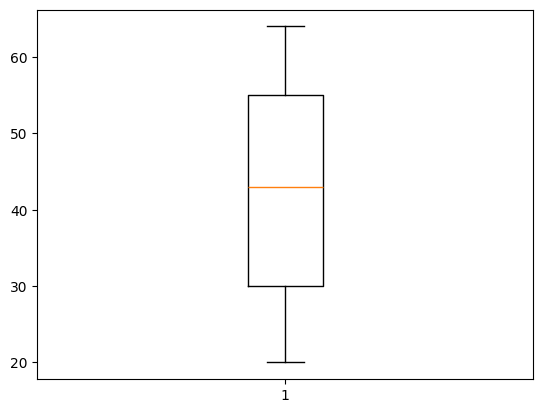

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

Model Training

In [19]:
%pip install xgboost catboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [21]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Experience', 'Age', 'Salary']

We have 4 categorical features : ['Education', 'Location', 'Job_Title', 'Gender']


In [22]:
X = df.drop(columns=['Salary'],axis=1)

In [23]:
X.head

<bound method NDFrame.head of        Education  Experience  Location Job_Title  Age  Gender
0    High School           8     Urban   Manager   63    Male
1            PhD          11  Suburban  Director   59    Male
2       Bachelor          28  Suburban   Manager   61  Female
3    High School          29     Rural  Director   45    Male
4            PhD          25     Urban   Analyst   26  Female
..           ...         ...       ...       ...  ...     ...
995  High School           8  Suburban   Analyst   25  Female
996  High School          24     Urban  Engineer   30  Female
997       Master          18     Rural   Analyst   44    Male
998     Bachelor          27  Suburban  Director   31  Female
999  High School          25     Urban  Director   41  Female

[1000 rows x 6 columns]>

In [24]:
Y= df['Salary']

In [26]:
Y

0       84620.053665
1      142591.255894
2       97800.255404
3       96834.671282
4      132157.786175
           ...      
995     64683.389864
996     74468.205020
997     98207.026024
998    108544.922720
999     71077.000066
Name: Salary, Length: 1000, dtype: float64

In [27]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.81216855,  1.51610662],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.45232427,  1.22204531],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.58679335,  1.36907597],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.3873124 ,  0.11931538],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.46684525, -0.83638389],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.22694906, -0.10123061]], shape=(1000, 15))

In [30]:
X.shape

(1000, 15)

In [32]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 15), (200, 15))

#### Create an Evaluate Function to give all metrics after model Training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9794.8140
- Mean Absolute Error: 7743.1084
- R2 Score: 0.8790
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10295.4494
- Mean Absolute Error: 8157.8985
- R2 Score: 0.8702


Lasso
Model performance for Training set
- Root Mean Squared Error: 9794.8159
- Mean Absolute Error: 7743.3415
- R2 Score: 0.8790
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10295.1210
- Mean Absolute Error: 8158.0423
- R2 Score: 0.8702


Ridge
Model performance for Training set
- Root Mean Squared Error: 9795.5509
- Mean Absolute Error: 7744.0145
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10286.9311
- Mean Absolute Error: 8156.7563
- R2 Score: 0.8704


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 11327.6174
- Mean Absolute Error: 8883.7

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.870401
1,Lasso,0.870195
0,Linear Regression,0.870186
7,CatBoosting Regressor,0.847966
5,Random Forest Regressor,0.842424
8,AdaBoost Regressor,0.819668
6,XGBRegressor,0.817955
3,K-Neighbors Regressor,0.790491
4,Decision Tree,0.746436


In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.02


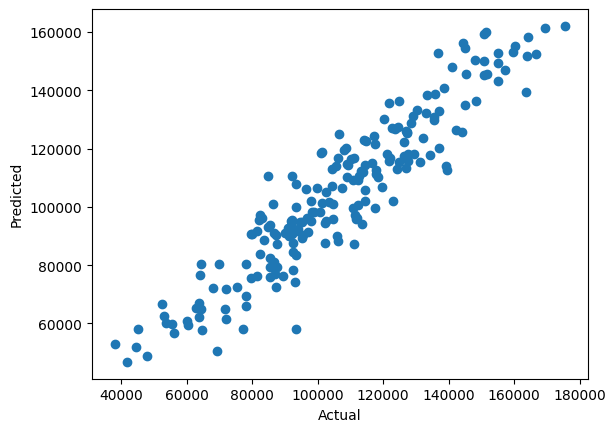

In [37]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

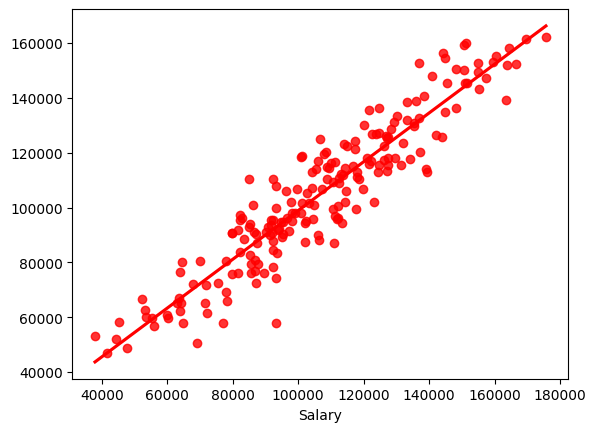

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [39]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,86677.840109,80980.434213,5697.405897
737,56036.163010,56651.224354,-615.061344
740,92226.871819,110570.889650,-18344.017831
660,100710.088052,98116.122768,2593.965284
411,91775.012832,93708.606780,-1933.593948
...,...,...,...
408,62915.445683,65123.705535,-2208.259851
332,92041.749991,90538.330749,1503.419242
208,85534.397486,76066.476083,9467.921403
613,164373.967469,158337.462907,6036.504562
